# **Various reinforcement learning strategies on openAI CartPole**


In [0]:
DRIVE = True

# Ignore if DRIVE is False
dir_path = "drive/My Drive/6-mini-projet"

## Imports

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import warnings

if DRIVE:
  import os
  from google.colab import drive

  drive.mount("drive")
  os.chdir(dir_path)

%load_ext autoreload
%autoreload 2

%matplotlib inline

! pip install ipython-autotime
%load_ext autotime

warnings.filterwarnings("ignore")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
from discretisations import obs_to_state_1
from agents import QLearn, SARSA
from strategies import EpsilonGreedy, EpsilonGreedyDecay, UCB

time: 30.4 ms


In [4]:
def smooth(arr, amplitude, nb_pass=1):
  res = arr
  for i in range(nb_pass):
    res = np.array([res[max(0,j-amplitude):j+amplitude].mean() \
                    for j in range(len(res))])
  return res

def episode():
  steps = 0
  done = False
  observation1 = env.reset()
  obs = list()
  while not done:
      # ----- SHOULD WE DISPLAY THE GRAPHIC INTERFACE ? -----
      # env.render()

      # ----- THE AGENT CHOOSE AN ACTION -----
      state1 = obs_to_state_1(observation1)
      action = agent.choose_action(state1)

      # ----- UPDATE ENV -----
      observation2, reward, done, info = env.step(action)
      state2 = obs_to_state_1(observation2)

      # ----- UPDATE AGENT -----
      agent.fit_step(state1, action, reward, state2)

      # ----- WE'RE MOVING ONTO THE NEXT STEP -----
      obs.append(observation1)
      observation1 = observation2

      steps += 1

  # ----- UPDATE SIMULATION STEPS COUNTER -----
  return steps, obs

time: 16.3 ms


## Shared parameters

In [5]:
# ----- STRATEGIES PARAMETERS -----

epsilon = 0.1
decay_factor = 0.9999
ucb_c = 20


# ----- AGENTS PARAMETERS -----

actions = [0, 1]
alpha = 0.7
gamma = 1
initial_policy = 0

time: 2.21 ms


## Agents and strategies initialisation

In [9]:
strategies = [
    EpsilonGreedy(epsilon),
    EpsilonGreedyDecay(epsilon, decay_factor),
    UCB(ucb_c)
]

agents = {
    "Random": SARSA(
        actions=actions,
        strategy=EpsilonGreedy(epsilon=1),
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy
    ),

    "QLearn-EpsilonGreedy": QLearn(
        actions=actions,
        strategy=strategies[0],
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy,
    ),

    "SARSA-EpsilonGreedy": SARSA(
        actions=actions,
        strategy=strategies[0],
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy,
    ),

    "QLearn-EpsilonGreedyDecay": QLearn(
        actions=actions,
        strategy=strategies[1],
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy,
    ),

    "SARSA-EpsilonGreedyDecay": SARSA(
        actions=actions,
        strategy=strategies[1],
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy,
    ),

    "QLearn-UCB": QLearn(
        actions=actions,
        strategy=strategies[2],
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy,
    ),

    "SARSA-UCB": SARSA(
        actions=actions,
        strategy=strategies[2],
        alpha=alpha,
        gamma=gamma,
        initial_policy=initial_policy,
    )
}

time: 27.6 ms


## **Main**

In [20]:
# ----- GAME INITIALIZATION -----
env = gym.make('CartPole-v0')

# ----- SIMULATIONS -----
simulations = 500

results = {}
observations = {}
for ag in agents.keys():
  results[ag] = np.zeros(simulations)
  observations[ag] = np.zeros(simulations)

print("{:-^42}".format(" Mean steps {} simulations ".format(simulations)))
for agent_name, agent in agents.items():
    agent.reset()
    for i in range(simulations):
        results[agent_name][i], observations[agent_name] = episode()

    print("{:<30} -> {:>8}".format(agent_name, results[agent_name].mean()))
env.close()

------- Mean steps 500 simulations -------
Random                         ->   23.072
QLearn-EpsilonGreedy           ->  123.072
SARSA-EpsilonGreedy            ->   55.526
QLearn-EpsilonGreedyDecay      ->  107.154
SARSA-EpsilonGreedyDecay       ->  146.512
QLearn-UCB                     ->   172.66
SARSA-UCB                      ->  141.078
time: 31.9 s


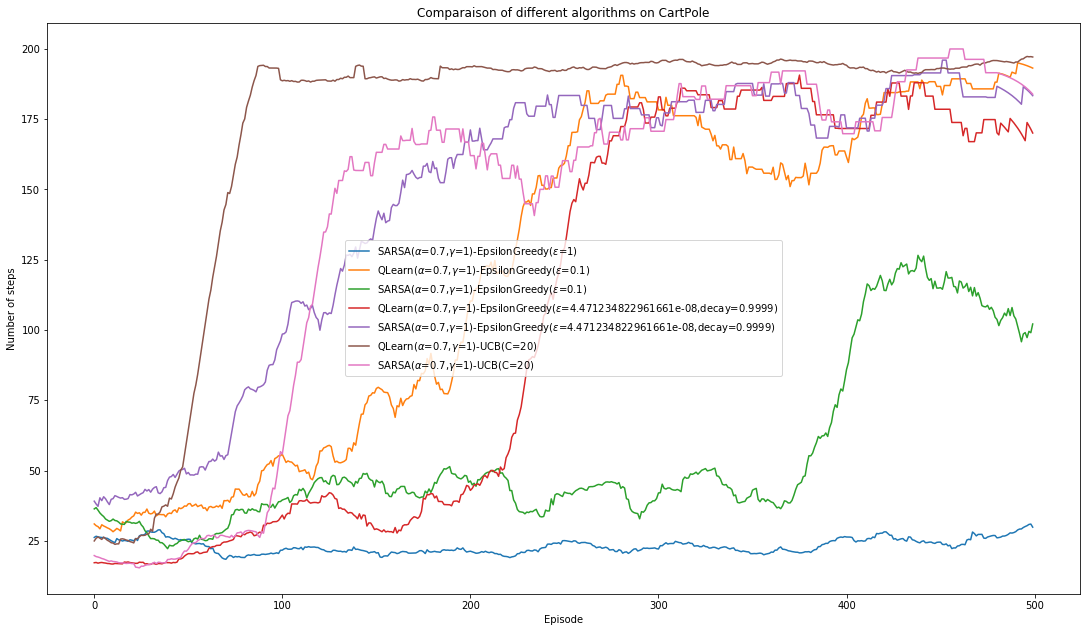

time: 733 ms


In [30]:
for ag_name, ag in agents.items():
  smooth_curve = smooth(results[ag_name], amplitude=20, nb_pass=1)
  plt.plot(smooth_curve, label=str(ag))

plt.legend()
plt.title("Comparaison of different algorithms on CartPole")
plt.ylabel("Number of steps")
plt.xlabel("Episode")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

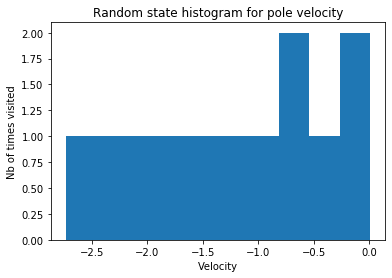

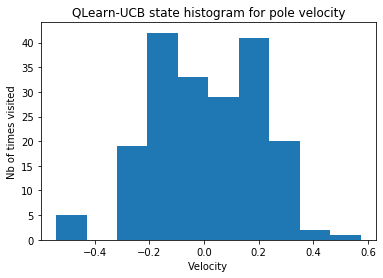

time: 381 ms


In [31]:
vel = {}
angles = {}
for agent_name in agents.keys():
  obs_array = np.array(observations[agent_name])
  angles[agent_name] = obs_array[:, 2]
  vel[agent_name] = obs_array[:, 3]

plt.hist(vel["Random"])
plt.title("Random state histogram for pole velocity")
plt.xlabel("Velocity")
plt.ylabel("Nb of times visited")
plt.show()

plt.hist(vel["QLearn-UCB"])
plt.title("QLearn-UCB state histogram for pole velocity")
plt.xlabel("Velocity")
plt.ylabel("Nb of times visited")
plt.show()

## **Variation of C for UCB Strategy**

Random  ->  21.748
QLearn-UCB-0.1  ->  12.268
SARSA-UCB-0.1  ->  11.742
QLearn-UCB-1  ->  15.364
SARSA-UCB-1  ->  21.71
QLearn-UCB-5  ->  66.274
SARSA-UCB-5  ->  66.378
QLearn-UCB-10  ->  103.82
SARSA-UCB-10  ->  139.13
QLearn-UCB-50  ->  138.188
SARSA-UCB-50  ->  140.756
QLearn-UCB-100  ->  148.084
SARSA-UCB-100  ->  143.41


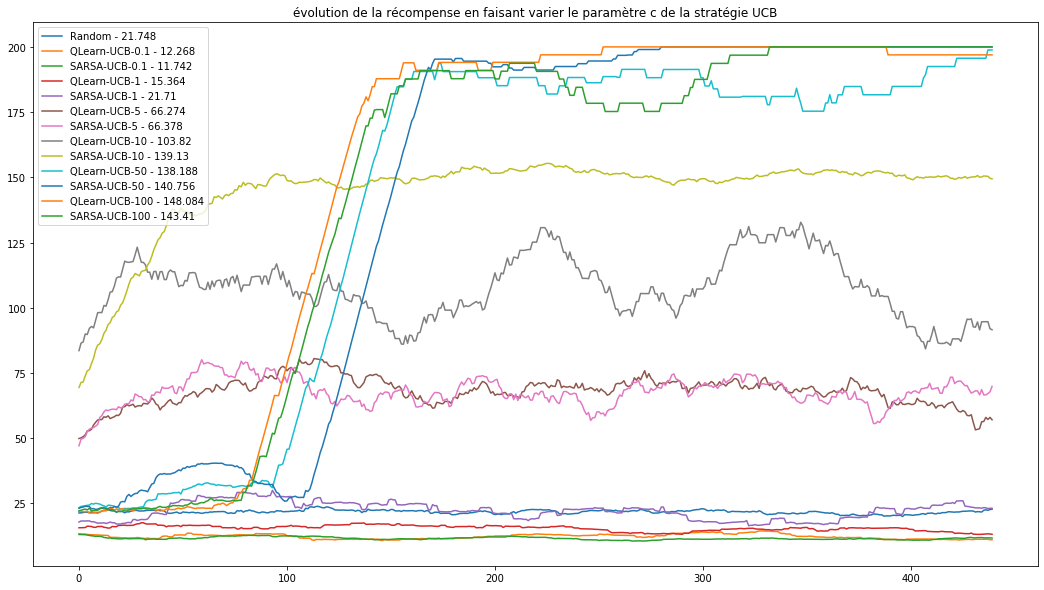


     cart_position, cart_velocity, pole_angle, pole_velocity
---------------------------------------------------------------
min  [-0.00653, -0.35704, -0.02172, -0.57281]
max  [0.20098, 0.42445, 0.02446, 0.6203]
var  [0.00333, 0.0295, 8e-05, 0.06373]
mean [0.08944, 0.0435, 0.001, 0.00826]
time: 50 s


In [26]:
import launcher_ucb

launcher_ucb.do(size=(18, 10), sim=500)